In [1]:
import sys 
import os 

import mplfinance as mpf

from src.visualization.visualize import AlphaVantagePlots as AVP
from src.data.get_data import CSVsLoader as CSVs
from src.common.globals import StockRelated

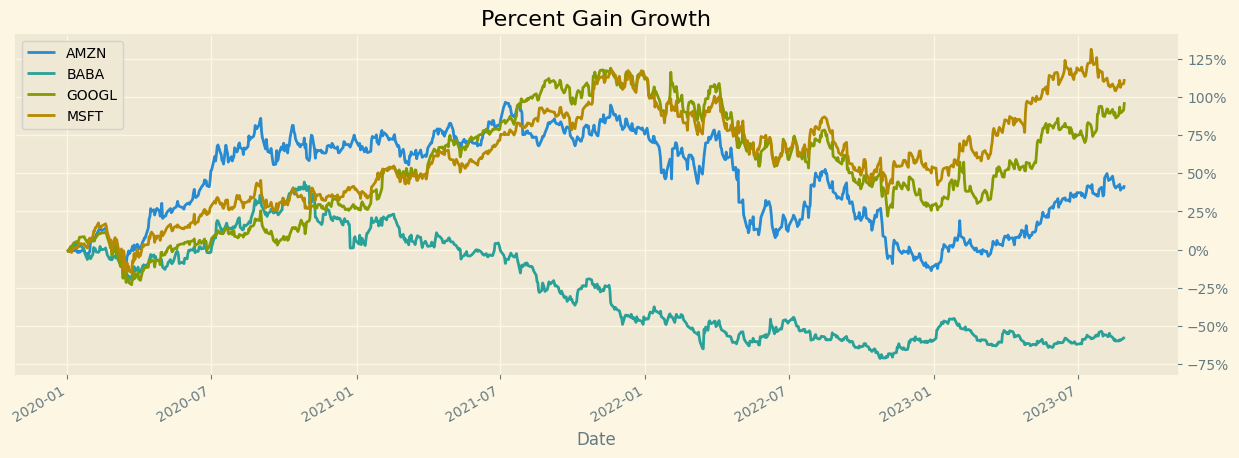

In [2]:
AVP.plot_prct_gain(['AMZN','BABA','GOOGL','MSFT'], '2020-01-01',  title='Percent Gain Growth') 

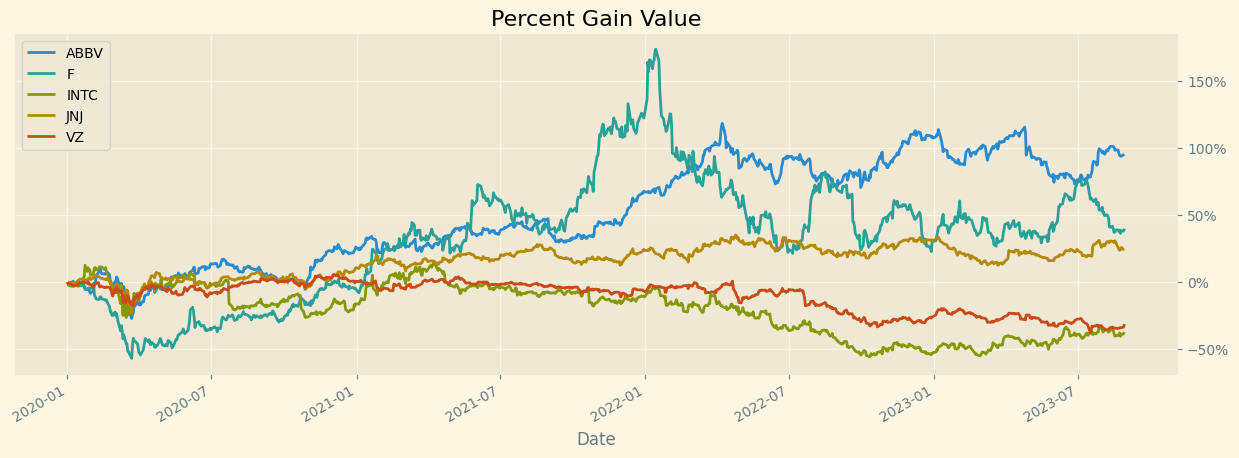

In [3]:
AVP.plot_prct_gain(['ABBV','F','INTC','JNJ','VZ'], '2020-01-01', title='Percent Gain Value')

Let's look at one stock closer.

In [4]:
df = CSVs.load_daily('MSFT')
df.head(2)

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
Date,,,,,,,,
1999-11-01,93.25,94.19,92.12,92.37,28.750198,26630600,0.0,1.0
1999-11-02,92.75,94.50,91.94,92.56,28.809335,23174500,0.0,1.0


Check if data is actually adjusted for splits and dividends as it should be per the API documentation:

In [5]:
df['8. split coefficient'].value_counts()

8. split coefficient
1.0    5994
2.0       1
Name: count, dtype: int64

In [6]:
splits = df[~df['8. split coefficient'].isin([1])].copy(deep=True)
splits['8. split coefficient'] = splits['8. split coefficient'].astype('int')
splits

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
Date,,,,,,,,
2003-02-18,24.62,24.99,24.4,24.96,15.537619,28707750,0.0,2


Quick check online confirms that these are the dates of the splits for stock.  
Let's see if the next day's open price is adjusted for the split.

In [7]:
df.loc['2003-02-13':'2003-02-19']

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
Date,,,,,,,,
2003-02-13,46.41,47.12,46.13,46.99,14.625655,36779100,0.00,1.0
2003-02-14,47.25,48.50,46.77,48.30,15.033393,45223200,0.00,1.0
2003-02-18,24.62,24.99,24.40,24.96,15.537619,28707750,0.00,2.0
2003-02-19,24.82,24.88,24.17,24.53,15.319744,46902700,0.08,1.0


As we can see split was calculated correctly.

#### Probabilities for stock to go up or down based on previous day percentage change.

In [8]:
proba_df = StockRelated.calc_proba_price_change_based(df, percentChange=2, days=730 )
proba_df

KeyError: 'return bucket'